## Diabetes Prediction 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fl
import plotly.express as px

In [3]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


    INFO:
    Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes

In [5]:
df.shape

(768, 9)

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

      We have no missing values, let's search for anomalities....

In [7]:
import ipywidgets
from ipywidgets import interact

In [8]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

@interact

def viz(x=cols):
    sns.distplot(df[x]);

interactive(children=(Dropdown(description='x', options=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick…

### Observation
    Thus, from the above visualization we can say that there are lot many unusual
    entries in the dataset
    Such as, minimum glucose range in females in usually 80 but here we have values
    near 0 too
    Similarly, Blood Pressure Range for females in India is normallly between 90-120,
    and the least blood pressure reading of an alive person recorded till date is 60
    but here we have many values between 0-59...

## Anolmalies:-
     Glucose: values<70
     Blood Pressure: values<60

In [12]:
pd.set_option("display.max_columns",9,"display.max_rows",768)
df['Glucose'].replace(to_replace=df[df['Glucose']<70]['Glucose'].values,
    value=int(df[df['Glucose']>70]['Glucose'].mean()),
    inplace=True)
df['BloodPressure'].replace(to_replace=df[df['BloodPressure']<60]['BloodPressure'].values,
    value=int(df[df['BloodPressure']>60]['BloodPressure'].mean()),
    inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,76,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,76,32,88,31.0,0.248,26,1
7,10,115,76,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


    Thus, the anomalities removed....

## Feature Engineering

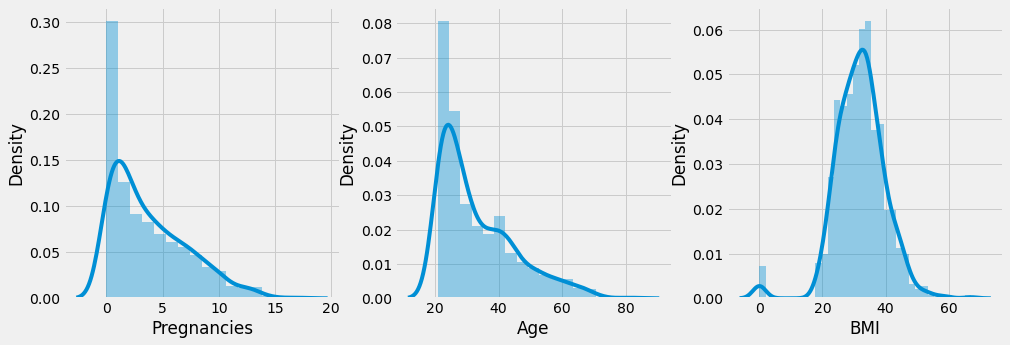

In [13]:
# lets Check the Distribution of all the columns again

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 1)
sns.distplot(df['Pregnancies'])

plt.subplot(1, 3, 2)
sns.distplot(df['Age'])

plt.subplot(1, 3, 3)
sns.distplot(df['BMI'])
plt.show()

In [14]:
# lets Create Bins for Ages 
# lets Create a Function
def age_cat(x):
    if x >= 21 and x < 30:
        return 'Millennials'
    elif x >= 30 and x < 60:
        return 'Adults'
    elif x > 60:
        return 'Old'

# lets apply this Function
df['Age'] = df['Age'].apply(age_cat)

# lets check the Values
df['Age'].value_counts()

Millennials    396
Adults         340
Old             27
Name: Age, dtype: int64

In [15]:
#Let's bin pregancies also
# lets Create a Function
def preg_cat(x):
    if x==0:
        return 'No Pregancies'
    elif x >= 0 and x <= 4:
        return 'Medium Pregnancies'
    elif x > 4:
        return 'Many Pregnancies'

# lets apply this Function
df['Pregnancies'] = df['Pregnancies'].apply(preg_cat)

# lets check the Values
df['Pregnancies'].value_counts()

Medium Pregnancies    381
Many Pregnancies      276
No Pregancies         111
Name: Pregnancies, dtype: int64

In [16]:
#Let's bin BMI also
# lets Create a Function
def bmi_cat(x):
    if x<18.5:
        return 'Under Weight'
    elif x == 18.5 and x <= 24.9:
        return 'Normal Weight'
    elif x > 24.9 and x <= 29.9:
        return 'Over Weight'
    elif x>29.9:
        return 'Obese'

# lets apply this Function
df['BMI'] = df['BMI'].apply(bmi_cat)

# lets check the Values
df['BMI'].value_counts()

Obese           472
Over Weight     179
Under Weight     15
Name: BMI, dtype: int64

In [19]:
#Let's bin Blood Pressure also
# lets Create a Function
def bp_cat(x):
    if x<90:
        return 'Low BP'
    elif x == 90 and x<=120:
        return 'Normal BP'
    elif x>120:
        return 'High BP'

# lets apply this Function
df['BloodPressure']=df['BloodPressure'].apply(bp_cat)

# lets check the Values
df['BloodPressure'].value_counts()

Low BP       708
Normal BP     22
High BP        1
Name: BloodPressure, dtype: int64

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Many Pregnancies,148,Low BP,35,0,Obese,0.627,Adults,1
1,Medium Pregnancies,85,Low BP,29,0,Over Weight,0.351,Adults,0
2,Many Pregnancies,183,Low BP,0,0,None,0.672,Adults,1
3,Medium Pregnancies,89,Low BP,23,94,Over Weight,0.167,Millennials,0
4,No Pregancies,137,Low BP,35,168,Obese,2.288,Adults,1


In [23]:
df = pd.get_dummies(df,columns=['Pregnancies'], prefix="Pregnancies")
df = pd.get_dummies(df,columns=['Age'], prefix="Age")
df = pd.get_dummies(df,columns=['BMI'], prefix="BMI")
df = pd.get_dummies(df,columns=['BloodPressure'], prefix="BP")
df

,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,...,BMI_Under Weight,BP_High BP,BP_Low BP,BP_Normal BP
0,148,35,0,0.627,...,0,0,1,0
1,85,29,0,0.351,...,0,0,1,0
2,183,0,0,0.672,...,0,0,1,0
3,89,23,94,0.167,...,0,0,1,0
4,137,35,168,2.288,...,0,0,1,0
5,116,0,0,0.201,...,0,0,1,0
6,78,32,88,0.248,...,0,0,1,0
7,115,0,0,0.134,...,0,0,1,0
8,197,45,543,0.158,...,0,0,1,0
9,125,0,0,0.232,...,1,0,0,0


In [25]:
df.shape

(768, 17)

In [26]:
## separate dependent & independent features
y=df['Outcome']
x=df.drop('Outcome',axis=1)

### splitting dataset & model Building

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [28]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred=logreg.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[115,  15],
       [ 27,  35]], dtype=int64)

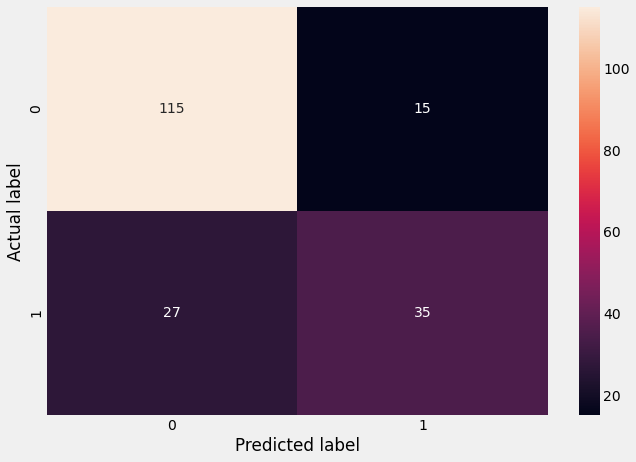

In [31]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

In [32]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.78125

### Cross validate your model

In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

In [34]:
score

array([0.72727273, 0.79220779, 0.79220779, 0.68831169, 0.72727273,
       0.81818182, 0.79220779, 0.83116883, 0.64473684, 0.82894737])

In [35]:
score.mean()

0.7642515379357484

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [37]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("f1_score:",f1_score(y_test, y_pred))

Accuracy: 0.78125
Precision: 0.7
Recall: 0.5645161290322581
f1_score: 0.625


In [38]:
from sklearn.metrics import roc_curve,roc_auc_score

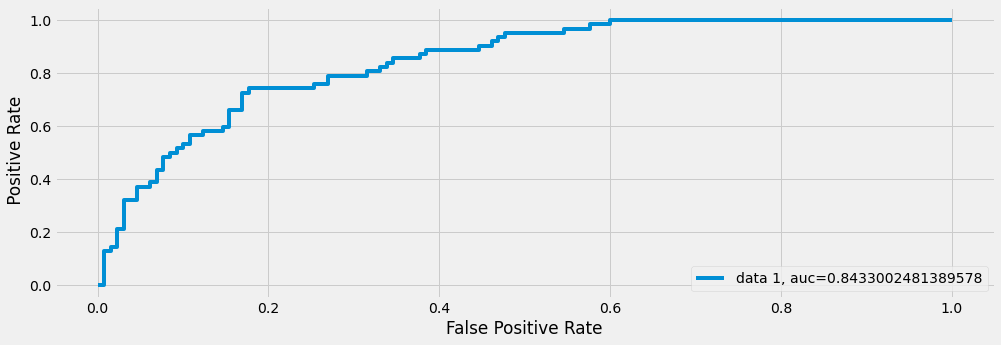

In [39]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()

### Trying multiple Algos

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

LogisticRegression
[[115  27]
 [ 15  35]]
0.78125




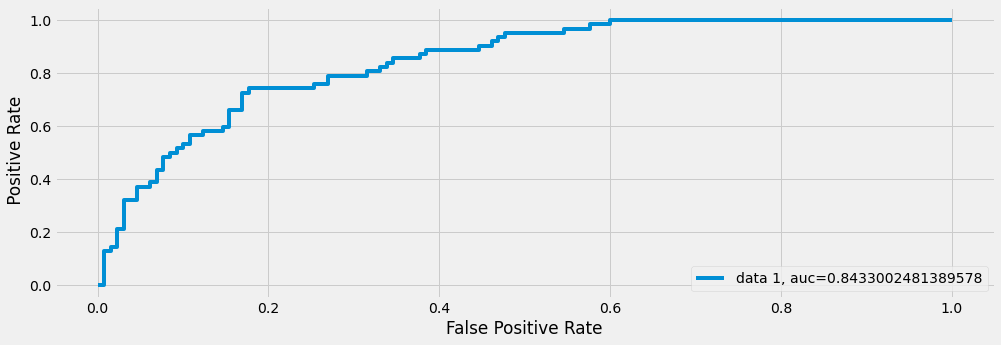

Naive Bayes
[[75  9]
 [55 53]]
0.6666666666666666




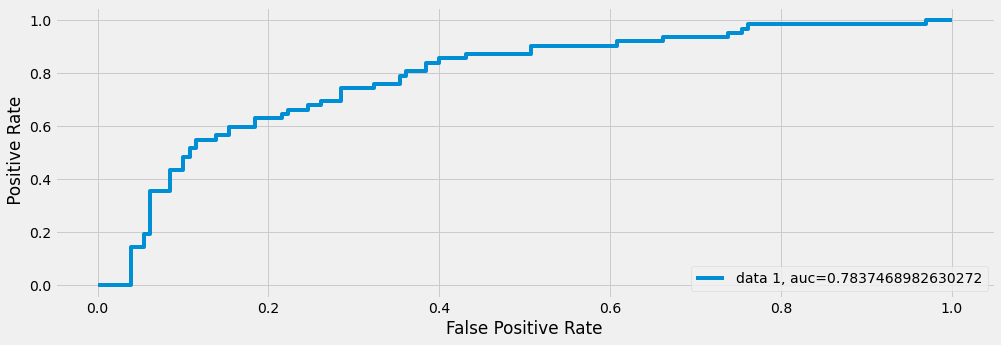

RandomForest
[[110  28]
 [ 20  34]]
0.75




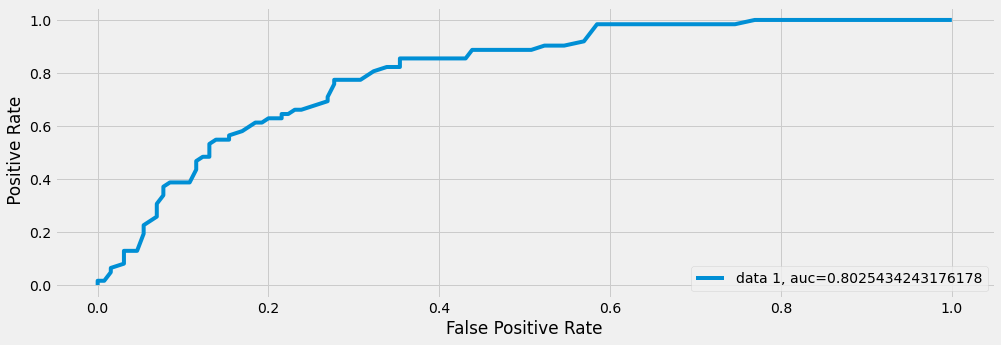

Decision Tree
[[91 31]
 [39 31]]
0.6354166666666666




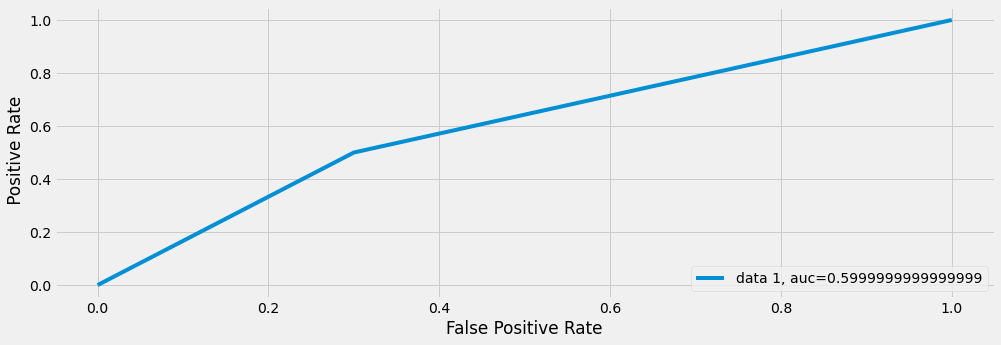

KNN
[[110  30]
 [ 20  32]]
0.7395833333333334




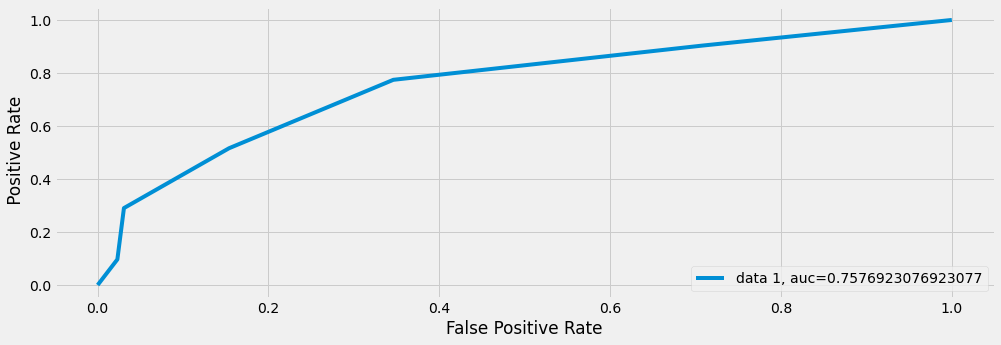

In [42]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    # Make predictions.
    predictions = model.predict(x_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')
    
    from sklearn.metrics import roc_curve,roc_auc_score
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate")
    plt.ylabel(" Positive Rate")
    plt.show()